# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
sinasc_pais = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]

In [5]:
sinasc_pais.groupby('munResNome').agg('mean')

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [6]:
sinasc_peso = sinasc_raw[['ESCMAE', 'PESO', 'DTNASC', 'SEXO']]

In [7]:
data_nasc = sinasc_peso[sinasc_peso['DTNASC'] == '2019-05-05']

In [8]:
data_nasc.groupby(['ESCMAE']).mean()

C:\Users\User\AppData\Local\Temp\ipykernel_11620\2116350410.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_nasc.groupby(['ESCMAE']).mean()


,PESO
ESCMAE,
12 anos ou mais,3149.285714
4 a 7 anos,3395.833333
8 a 11 anos,3254.343750


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [9]:
sinasc = sinasc_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI', 'munResNome',
]].copy()

In [10]:
sinasc.loc[:,'DTNASC'] = pd.to_datetime(sinasc['DTNASC'])

C:\Users\User\AppData\Local\Temp\ipykernel_11620\3085802253.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sinasc.loc[:,'DTNASC'] = pd.to_datetime(sinasc['DTNASC'])


### O município que menos nasceu bebês foi Castanheiras      

In [14]:
maes = sinasc[['IDADEMAE', 'munResNome']]
municipio = maes[maes['munResNome'] == 'Castanheiras']

In [15]:
# qual a idade media, maxima, minima das maes nesse municipio?

municipio.groupby('munResNome').agg(['min', np.mean, max])

IDADEMAE              
                  min      mean max
munResNome                         
Castanheiras       17  27.28125  39

In [16]:
pais = sinasc[['IDADEPAI', 'munResNome']]
municipio = pais[pais['munResNome'] == 'Castanheiras']

In [22]:
# qual a idade media, maxima, minima dos pais nesse municipio?

municipio.groupby('munResNome').agg(['min', np.mean, max])

IDADEPAI                 
                  min       mean   max
munResNome                            
Castanheiras     17.0  30.392857  43.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [25]:
sinasc = sinasc_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'QTDFILVIVO', 'munResNome', 'ESCMAE', 'IDADEPAI'
]].copy()

In [60]:
sinasc.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,QTDFILVIVO,munResNome,ESCMAE,IDADEPAI,MESNASC
DTNASC,,,,,,,,,,,
2019-02-19,19,Masculino,9.0,10.0,3685,4,0.0,Alta Floresta D'Oeste,8 a 11 anos,26.0,2
2019-02-21,29,Feminino,8.0,9.0,3055,4,1.0,Alta Floresta D'Oeste,8 a 11 anos,24.0,2
2019-02-25,37,Feminino,8.0,10.0,3460,4,2.0,Alta Floresta D'Oeste,8 a 11 anos,32.0,2
2019-03-20,30,Feminino,9.0,10.0,2982,3,0.0,Alto Alegre dos Parecis,12 anos ou mais,24.0,3
2019-03-23,30,Feminino,8.0,10.0,3310,4,1.0,Alta Floresta D'Oeste,8 a 11 anos,27.0,3


**Quantidade de bebês fem e masc por mês <a name="exemplo_4"></a>**

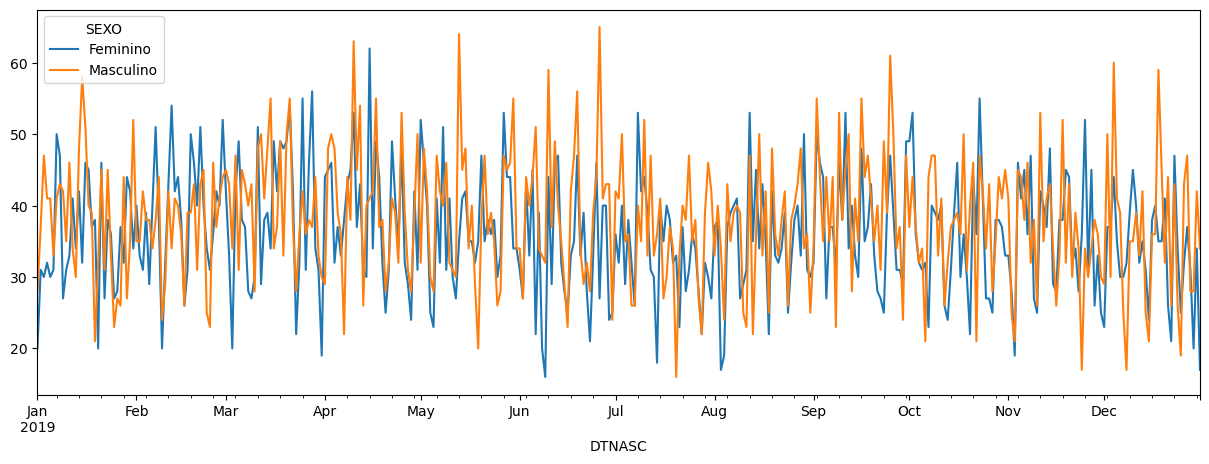

In [82]:
sinasc.groupby(['DTNASC', 'SEXO'])['IDADEMAE'].count().unstack().plot(figsize=[15,5]);

In [74]:
mun_nasc = sinasc[['munResNome', 'MESNASC']]
mais_nasc = mun_nasc[mun_nasc['MESNASC'] == 3]

mais_nasc.groupby('munResNome')['MESNASC'].count().sort_values(ascending=False)


munResNome
Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Espigão D'Oeste               44
Machadinho D'Oeste            44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alvorada D'Oeste              22
Alto Paraíso                  22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Colorado do Oeste             19
Seringueiras                  19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14

**- O Município que mais nasceram bebês em Março, foi Porto Velho**

In [75]:
sinasc_4 = sinasc_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'QTDFILVIVO', 'munResNome', 'ESCMAE', 'IDADEPAI'
]].copy()

In [77]:
#- qual a quantidade de filhos vivos media, maxima, minima nesse municipio?

qtd_filhos_vivos = sinasc_4[['QTDFILVIVO', 'munResNome']]
municipio = qtd_filhos_vivos[qtd_filhos_vivos['munResNome'] == 'Porto Velho']

In [79]:
municipio.groupby('munResNome')['QTDFILVIVO'].agg(['min', np.mean, max])

,min,mean,max
munResNome,,,
Porto Velho,0.0,1.167236,12.0


In [88]:
##- qual a idade media, maxima, minima dos pais nesse municipio?

pais = sinasc_4[['IDADEPAI', 'munResNome']]
municipio = pais[pais['munResNome'] == 'Porto Velho']

In [89]:
municipio.groupby('munResNome')['IDADEPAI'].agg(['min', np.mean, max])

,min,mean,max
munResNome,,,
Porto Velho,16.0,32.352679,65.0


# Alguns insights

1º - O mês que mais nasceram bebê de sexo masculino foi Julho;

2º - A média de idades do Pais em Castanheiras é menor do que em Porto Velho;

3º - O município com a menor média de idade entre as Mães é Governador Jorge Teixeira;